# Deep Learning Tutorial: Build and train an Image Recognizer on your own dataset in < 10 minutes using Fastai library

This tutorial is a concise step by step guide for building and training image classification on **any** image dataset of your choice.<br>

By the end of this tutorial, you will be able to:

- Scrape images from Google Images and create your own Image dataset
- Train and run an image classifier, using a Deep Neural Network
- Visualize and adequately interpret classification results
- Apply classification model to new test images
 
The tutorial uses [Fastai library](https://docs.fast.ai/index.html), so please have it installed on your machine. If you are new to this, simply set up a Google Cloud Virtual Machine following [this guide](https://course.fast.ai/start_gcp.html) -- it may take you few minutes but it will be great learning experience.

## 1. Image Dataset Download and Setup

If you would like to use your own image dataset for this tutorial, rearrange the dataset in a way that images of same class are under same folder. Name the folders with the class labels.

If you do not have an available dataset and would like to scrape one from Google Images, install [Fatkun Batch Download Image](https://chrome.google.com/webstore/detail/fatkun-batch-download-ima/nnjjahlikiabnchcpehcpkdeckfgnohf) extension on your google chrome browser. After successffully installing the extension, you can download any set of google images by simply clicking the extension tab. There are other ways to scrape Google Images, I find this way to be the most convinient. 

Move all of your folders to your notebook directory or the path of your choice.

For instance, in this tutorial we will be classifying **Monkeys Faces**, so we created 6 folders corresponding to the 6 different types of monkeys and uploaded them to our GCP VM instance, as shown below.<br><br>


<img src="./../Tutorial1_img1.png" width="400"/>

## 2. Image Recognition Code

**_For a further explanation of the code and functions used, check out my other blog: Concise Image Recongition using Fastai_**

### Initialization

In [10]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [11]:
from fastai.vision import *
from fastai.metrics import error_rate

In [12]:
bs = 64  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size
PATH = './'

PATH is the path of your folders. You may keep ./ as your path if your folders are on the same directory as your notebook.

Let's retrieve your image classes,

In [13]:
classes = []
for d in os.listdir(PATH): 
    if os.path.isdir(d) and not d.startswith('.'):
        classes.append(d)       

print ("There are ", len(classes), "classes:", classes)            

There are  6 classes: ['Macaque', 'Gibbon', 'Chimpanzee', 'Orungatun', 'Gorilla', 'Mandrill']


Let's verify there are not any corrupt images that cannot be read. If found any, they will simply be deleted.

In [14]:
for c in classes:
    verify_images(c, delete=True);

### Creating and training the classifier

Let's create our training and validation sets,

In [17]:
data  = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)

In [18]:
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

There are 292 training images and 72 validation images.


Let's visualize some images from your different classes,

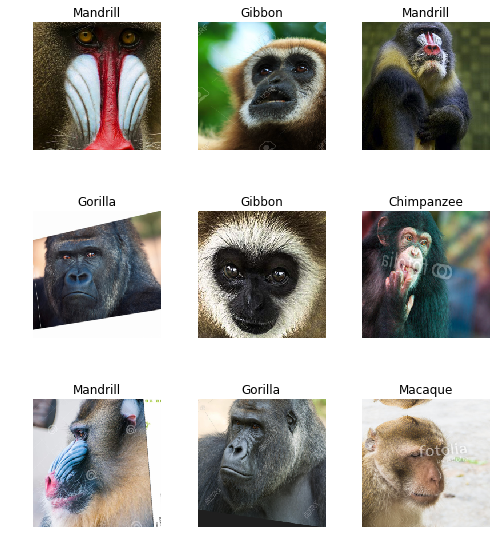

In [19]:
data.show_batch(rows=3, figsize=(7,8))

Let's build our Deep Convolutional Neural Network (CNN),

In [20]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

Let's pick the most appropriate learning rate,

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


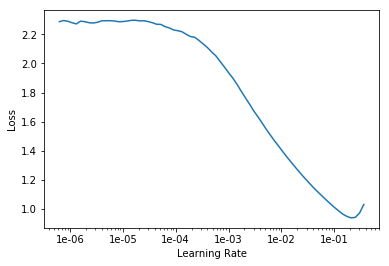

In [23]:
learn.lr_find();
learn.recorder.plot()

Use the above plot to pick adequate learning rates for your model, we need two learning rates:

- The first learning rate is just before the loss starts to increase, preferrably 10x smaller than the rate at which the loss starts to increase. For instance, 1e-02 for our Monkeys Face Recognition dataset. 

- The second learning rate is 10x smaller than the first learning rate, so 1e-03 in our example.

The plot may be different for your dataset, so make sure to pick these two learning rates according to your plot.

<br>Replace your chosen learning rates in the **slice** fucntion below and let's train the model

In [12]:
learn.fit_one_cycle(6, max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,accuracy
1,1.900097,0.902349,0.736111
2,1.095292,0.175255,0.958333
3,0.724865,0.161813,0.930556
4,0.543525,0.141485,0.944444
5,0.424219,0.165133,0.944444
6,0.346852,0.163987,0.944444
7,0.291714,0.171773,0.944444
8,0.249254,0.171475,0.944444


We achieved an accuracy of 94% on our Monkeys Face Recognition with only few lines of code and without much tuning of the parameters. This is GREAT.

We are DONE but let's further interpret the results.

## Results Interpretation and Visualization

We use the ClassificationInterpretation class to interpret our results.

In [13]:
interp = ClassificationInterpretation.from_learner(learn)

We can start by visualizing a confusion matrix, which ....

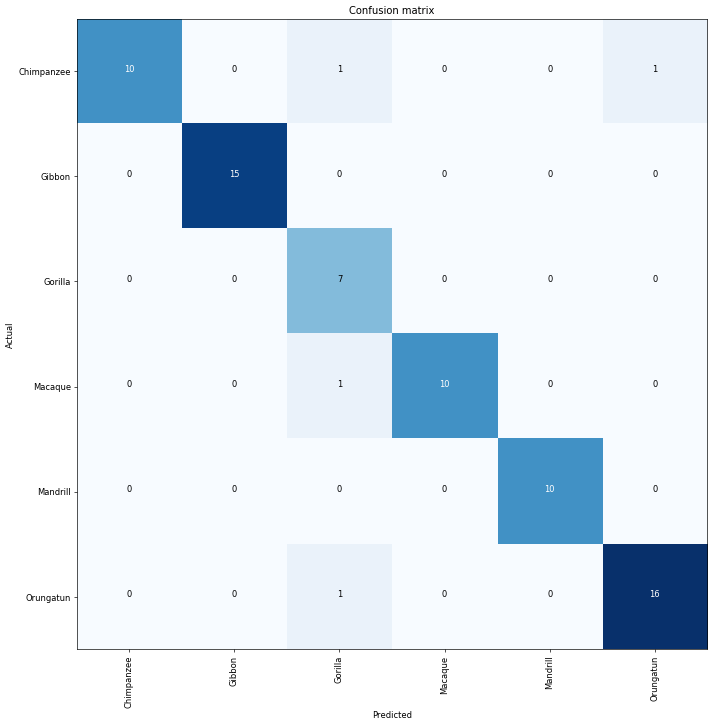

In [14]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

We can also plot images with top losses; in other words, ....


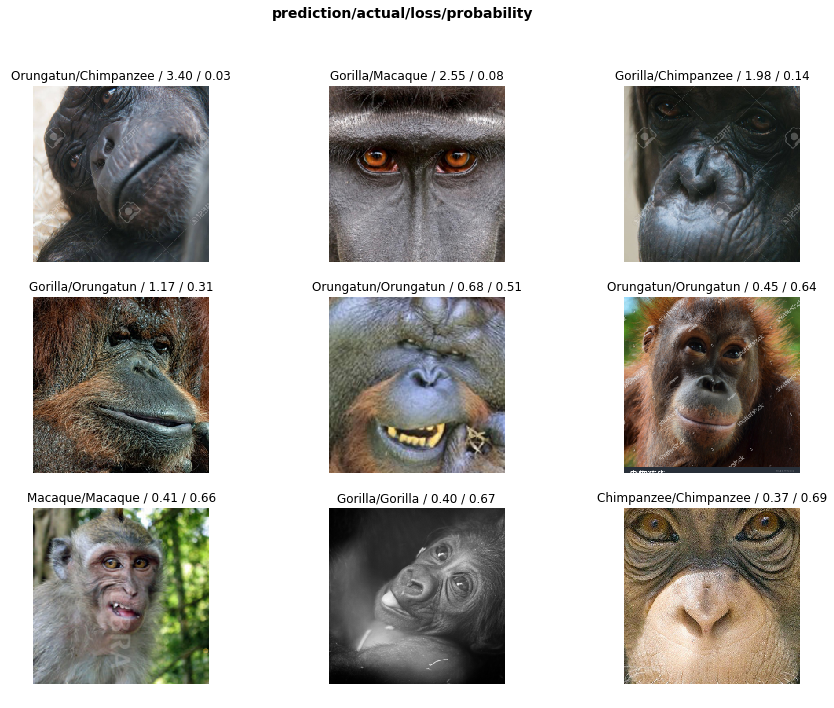

In [19]:
interp.plot_top_losses(9, figsize=(15,11))

## Testing the model on a new image

First, congratulations! You have successfully built an Image Recognizer on your own image dataset.

If you would like to test your model with a new set of test images it has never seen before, you can simply run the following:

If you acquire or download a new image and want to classify based on the built model, simply run the following:

Dont' have an image, Try a new image by....

go to google images or uplash and download some monkey image and let your model classify it.

In [ ]:
path = '../Test Images/' #The path of your test image

img = open_image(get_image_files(path)[0])

# Get prediction
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

img.show()

Of course, we could further fine tune this model and adjust the weights across all 34 layers. We could also replace ResNet-34 with a larger model, e.g. ResNet-50.

There are also other ways, such as deleting the top loss pictures. We will see more of this in the future tutorials.

Aknowedlgement: 

if you like, clap

Now go and celebrate!